# Spotify Exploratory Data Analysis Project

<ul>
<li>Top 10 most popular songs</li>
<li>Top 5 loudest tracks</li>
<li>Top 5 most danceability songs</li>
<li>Top 5 instrumentalness tracks</li>
<li>Correlation between all the features of the dataset
</li>
<li>Correlation between loudness and energy</li>
<li>Number of songs per year of release</li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style("darkgrid")

## Load the Spotify track dataset

In [3]:
df = pd.read_csv("spotify_tracks.csv", error_bad_lines=False)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 239394: expected 20 fields, saw 26\n'


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


## Data Cleaning

In [4]:
df.isna().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592386 entries, 0 to 592385
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                592386 non-null  object 
 1   name              592315 non-null  object 
 2   popularity        592386 non-null  int64  
 3   duration_ms       592386 non-null  int64  
 4   explicit          592386 non-null  int64  
 5   artists           592386 non-null  object 
 6   id_artists        592386 non-null  object 
 7   release_date      592386 non-null  object 
 8   danceability      592386 non-null  float64
 9   energy            592386 non-null  float64
 10  key               592386 non-null  int64  
 11  loudness          592386 non-null  float64
 12  mode              592386 non-null  int64  
 13  speechiness       592386 non-null  float64
 14  acousticness      592386 non-null  float64
 15  instrumentalness  592386 non-null  float64
 16  liveness          59

In [6]:
df.shape

(592386, 20)

In [7]:
df.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [8]:
len(df.columns)

20

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,592386.0,27.619493,18.366435,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,592386.0,230000.058756,126199.448730,3344.0,175150.2500,214854.000000,263763.75000,5621218.000
explicit,592386.0,0.043833,0.204723,0.0,0.0000,0.000000,0.00000,1.000
danceability,592386.0,0.563929,0.166115,0.0,0.4530,0.578000,0.68600,0.991
energy,592386.0,0.542298,0.251665,0.0,0.3440,0.549000,0.74800,1.000
key,592386.0,5.222325,3.519303,0.0,2.0000,5.000000,8.00000,11.000
loudness,592386.0,-10.193597,5.086720,-60.0,-12.8760,-9.229000,-6.47300,5.376
mode,592386.0,0.659896,0.473744,0.0,0.0000,1.000000,1.00000,1.000
speechiness,592386.0,0.104490,0.179290,0.0,0.0339,0.044200,0.07610,0.971
acousticness,592386.0,0.449385,0.348439,0.0,0.0972,0.421000,0.78300,0.996


## Data Analysis

### Top 10 most popular songs

In [10]:
sorted_popularity = df.sort_values("popularity", ascending=False)
sorted_popularity.head(10)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4
93805,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021-03-05,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4
92813,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4
92814,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],2020-09-16,0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4
93807,4cG7HUWYHBV6R6tHn1gxrl,Friday (feat. Mufasa & Hypeman) - Dopamine Re-...,94,169153,0,"['Riton', 'Nightcrawlers', 'Mufasa & Hypeman',...","['7i9j813KFoSBMldGqlh2Z1', '1gALaWbNDnwS2ECV09...",2021-01-15,0.824,0.862,2,-3.424,1,0.1260,0.00760,0.000132,0.3030,0.801,122.980,4
92816,3FAJ6O0NOHQV8Mc5Ri6ENp,Heartbreak Anniversary,94,198371,0,['Giveon'],['4fxd5Ee7UefO4CUXgwJ7IP'],2020-03-27,0.449,0.465,0,-8.964,1,0.0791,0.52400,0.000001,0.3030,0.543,89.087,3


### Top 5 loudest tracks

In [11]:
top_five_loudest = df[["loudness", "name"]].sort_values(by="loudness", ascending=True)[:5]
top_five_loudest

,loudness,name
12550,-60.0,Pause Track - Live
1570,-60.0,Pause Track
162573,-60.0,Two Minutes Silence
1753,-60.0,Pause Track
549692,-60.0,Anniversary of World War III


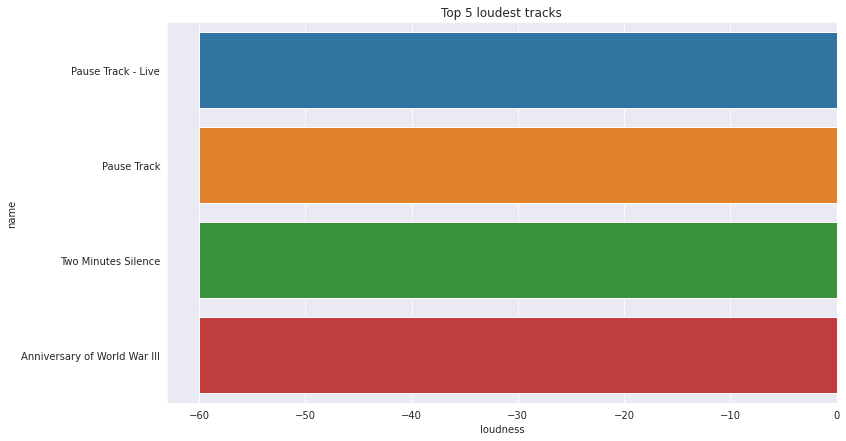

In [12]:
plt.figure(figsize=(12, 7))
sns.barplot(x="loudness", y="name", data=top_five_loudest)
plt.title("Top 5 loudest tracks")
plt.show()

### Top 5 most danceability songs

In [13]:
top_five_artists_danceable_songs = df[["danceability", "name", "artists"]].sort_values(by="danceability", ascending=False)[:5]
top_five_artists_danceable_songs

,danceability,name,artists
424272,0.991,Puisorul cafeniu,['Malina Olinescu']
62569,0.988,Funky Cold Medina,['Tone-Loc']
257970,0.988,Tío Mario,['Susana Bosch']
156664,0.988,Who Loves The Sun feat. Jo.Ke - Edit,"['Nu', 'Jo.Ke']"
361816,0.987,Cool - Leonardo La Mark Remix,"['Spooner Street', 'Rio Dela Duna', 'Leonardo ..."


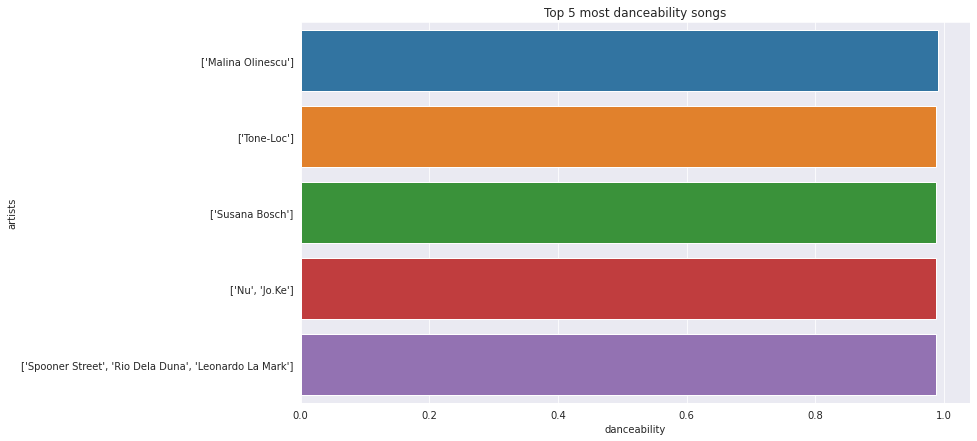

In [14]:
plt.figure(figsize=(12, 7))
sns.barplot(x="danceability", y="artists", data=top_five_artists_danceable_songs)
plt.title("Top 5 most danceability songs")
plt.show()

### Top 5 instrumentalness tracks

In [15]:
top_five_instrumentalness = df[["instrumentalness", "name", "artists"]].sort_values(by="instrumentalness", ascending=False)[:5]
top_five_instrumentalness

,instrumentalness,name,artists
300558,1.0,White Noise - Loopable With No Fade,"['Erik Eriksson', 'Lullabies for Deep Meditati..."
91234,1.0,Soft Brown Noise,['High Altitude Samples']
449923,1.0,Air Conditioner - Loopable with no fade,"['Erik Eriksson', 'White Noise Baby Sleep', 'W..."
444081,1.0,Ruído Branco para Dormir,['Ruído Branco']
284711,1.0,White Noise - BP 228 hz,['Granular']


### Correlation between all the features of the dataset


[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'duration_ms'),
 Text(2.5, 0, 'danceability'),
 Text(3.5, 0, 'energy'),
 Text(4.5, 0, 'loudness'),
 Text(5.5, 0, 'speechiness'),
 Text(6.5, 0, 'acousticness'),
 Text(7.5, 0, 'instrumentalness'),
 Text(8.5, 0, 'liveness'),
 Text(9.5, 0, 'valence'),
 Text(10.5, 0, 'tempo'),
 Text(11.5, 0, 'time_signature')]

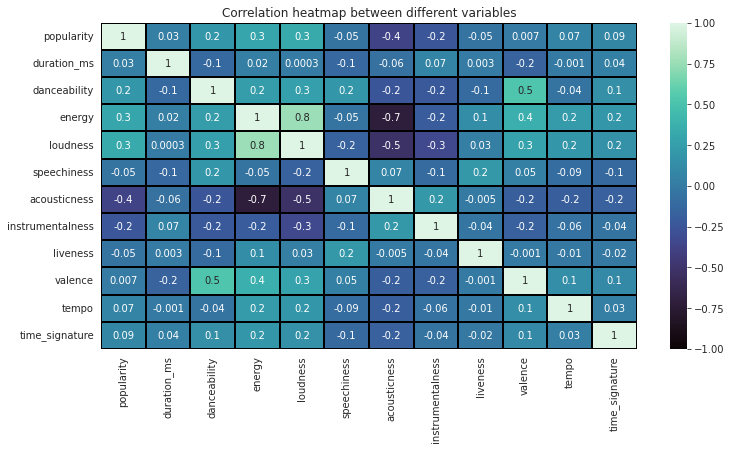

In [16]:
corr_df= df.drop(['key', 'mode', 'explicit'], axis=1).corr(method='pearson')
plt.figure(figsize=(12,6))
heatmap=sns.heatmap(corr_df, annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap='mako', linewidths=1, linecolor='black')
heatmap.set_title('Correlation heatmap between different variables')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

In [17]:
# There is high correlation between energy and loudness

### Correlation between loudness and energy

[Text(0.5, 1.0, 'Loudness vs Energy correlation')]

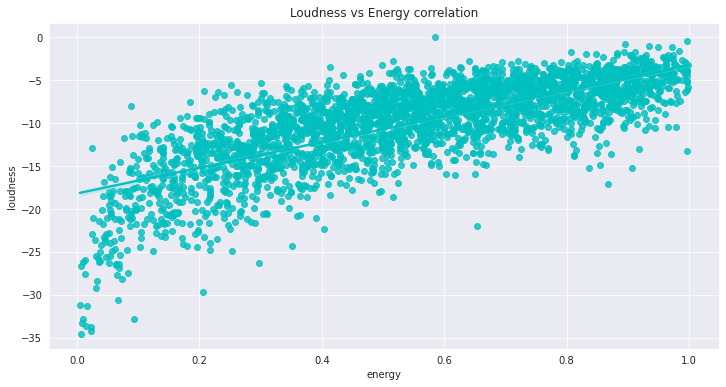

In [18]:
df2=df.sample(int(0.005*len(df)))
plt.figure(figsize=(12,6))
sns.regplot(data = df2, y = 'loudness', x = 'energy', color= 'c').set(title='Loudness vs Energy correlation')

In [19]:
# There is an upward trend in correlation between loudness and energy song which indicates louder songs are more energetic.

### Number of songs per year of release

In [20]:
df.set_index("release_date", inplace = True)
df.index= pd.to_datetime(df.index)
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
release_date,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
1922-01-01,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [21]:
# creating a new column of year of releasing date 
df["dates"]=df.index.get_level_values("release_date")
df.dates = pd.to_datetime(df.dates)
years=df.dates.dt.year

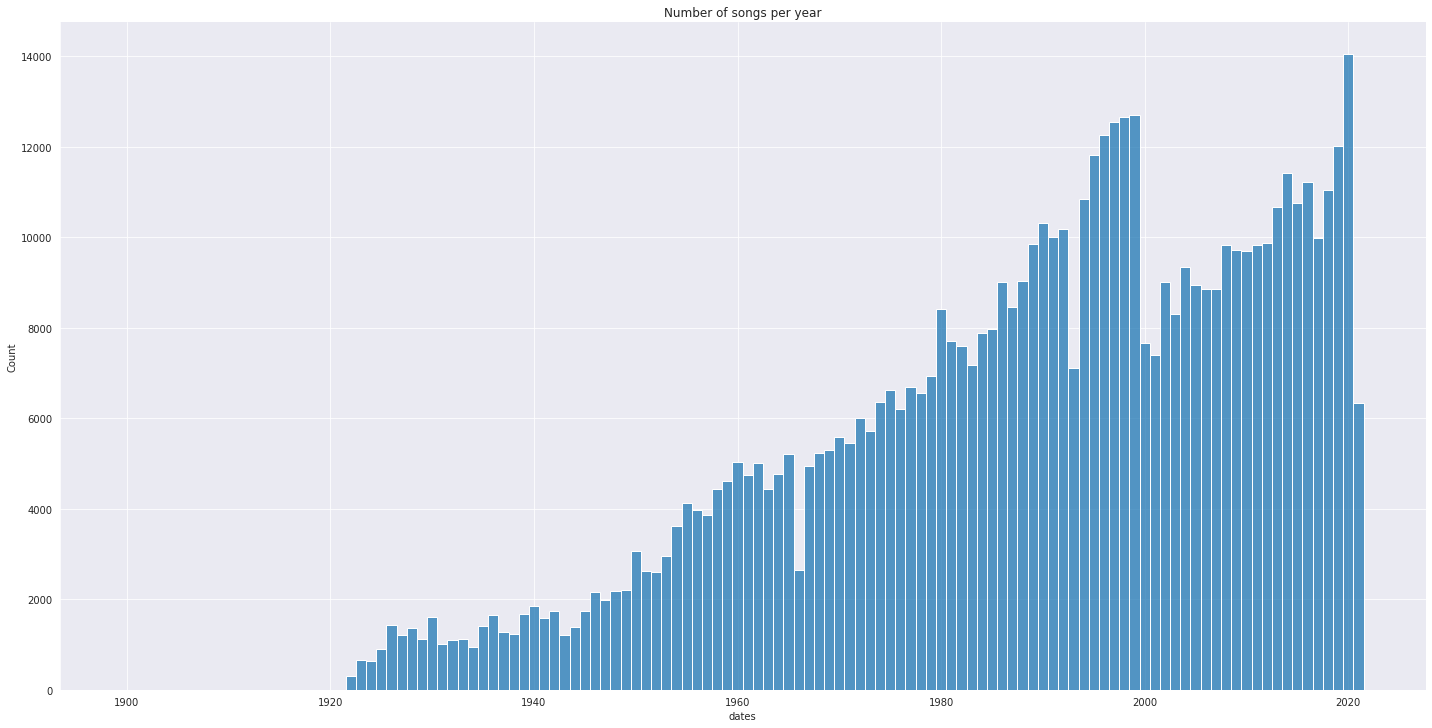

In [22]:
# Find Number of Songs by year of release
sns.displot(data = years, discrete = True, aspect=2, height=10, kind="hist").set(title="Number of songs per year")



In [23]:
# The dataset only has data till 2021, hence the dip for 2021.
# There is a gradual increase in songs released every year till 2000.
# Then there is a sudden decrease in number of songs in 2000,then starts increasing again.
# 2020, has the most number of released songs.